In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3 as sqlite

In [2]:

immigrantstock=pd.read_excel('../data/UN_MigrantStockTotal_2019.xlsx',
             sheet_name= 'Table 1',
              header=15, skiprows=[i for i in range (16,39)])

In [3]:
immigrantstock=immigrantstock.loc[~(immigrantstock['Unnamed: 0']==44)& ~(immigrantstock['Unnamed: 0']==54) & ~(immigrantstock['Unnamed: 0']==60)
                   & ~(immigrantstock['Unnamed: 0']==78) & ~(immigrantstock['Unnamed: 0']==79) & ~(immigrantstock['Unnamed: 0']==87)
                   & ~(immigrantstock['Unnamed: 0']==106) & ~(immigrantstock['Unnamed: 0']==107) & ~(immigrantstock['Unnamed: 0']==113)
                   & ~(immigrantstock['Unnamed: 0']==123) & ~(immigrantstock['Unnamed: 0']==124) & ~(immigrantstock['Unnamed: 0']==132)
                   & ~(immigrantstock['Unnamed: 0']==144) & ~(immigrantstock['Unnamed: 0']==145) & ~(immigrantstock['Unnamed: 0']==172)
                   & ~(immigrantstock['Unnamed: 0']==181) & ~(immigrantstock['Unnamed: 0']==196) & ~(immigrantstock['Unnamed: 0']==197)
                   & ~(immigrantstock['Unnamed: 0']==200) & ~(immigrantstock['Unnamed: 0']==206) & ~(immigrantstock['Unnamed: 0']==214)
                   & ~(immigrantstock['Unnamed: 0']==224) & ~(immigrantstock['Unnamed: 0']==225) & ~(immigrantstock['Unnamed: 0']==226)
                   & ~(immigrantstock['Unnamed: 0']==237) & ~(immigrantstock['Unnamed: 0']==251) & ~(immigrantstock['Unnamed: 0']==268)
                   & ~(immigrantstock['Unnamed: 0']==278)]

In [4]:
immigrantstock

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,1990,1995,2000,2005,2010,...,2010.1,2015.1,2019.1,1990.2,1995.2,2000.2,2005.2,2010.2,2015.2,2019.2
0,24,Burundi,NaN,108,B R,333110,254853,125628,172874,235259,...,115823.0,142790,158163.0,169843,130688,64534,88069,119436,147020.0,162855
1,25,Comoros,NaN,174,B,14079,13939,13799,13209,12618,...,6060.0,6071,6047.0,7362,7325,7288,6923,6558,6484.0,6457
2,26,Djibouti,NaN,262,B R,122221,99774,100507,92091,101575,...,53295.0,59081,60654.0,57979,47298,47587,40776,48280,53270.0,54687
3,27,Eritrea,NaN,232,I,11848,12400,12952,14314,15676,...,8603.0,8833,8922.0,5620,5858,6096,6585,7073,7108.0,7179
4,28,Ethiopia,NaN,231,B R,1155390,806904,611384,514242,568748,...,298069.0,591409,637963.0,548106,382787,289165,244517,270679,570233.0,615120
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,279,Bermuda,NaN,60,B,15683,16676,17668,18276,18884,...,9202.0,9336,9439.0,8126,8632,9137,9410,9682,9790.0,9897
256,280,Canada,NaN,124,B,4333318,4864778,5511914,6078985,6761226,...,3236539.0,3533164,3786190.0,2223666,2508673,2852779,3163147,3524687,3895493.0,4174467
257,281,Greenland,NaN,304,B,9282,7121,6601,6556,6091,...,4119.0,3812,3742.0,2810,2246,1985,2095,1972,1985.0,1948
258,282,Saint Pierre and Miquelon,NaN,666,B,1099,1320,1458,1147,1017,...,531.0,516,519.0,539,638,702,550,486,470.0,471


In [5]:
img_stk_gndr=immigrantstock.rename(columns = {'Unnamed: 0':'Sort order','Unnamed: 1' : 'Major country, area of destination',
                                          'Unnamed: 2' : 'Notes','Unnamed: 3' : 'Code','Unnamed: 4' : 'Type of data',
                                          1990 : 'M/F 1990',1995 : 'M/F 1995',2000 : 'M/F 2000',
                                         2005:'M/F 2005',2010 : 'M/F 2010',2015 : 'M/F img_stk 2015',2019: 'M/F img_stk 2019',
                                          1990.1 : 'M 1990',1995.1 : 'M 1995',2000.1 : 'M 2000',
                                         2005.1:'M 2005','2010.1' : 'M 2010','2015.1' : 'M img_stk 2015','2019.1': 'M img_stk 2019',
                                         '1990.2' : 'F 1990','1995.2' : 'F 1995','2000.2' : 'F 2000',
                                         '2005.2':'F 2005','2010.2' : 'F 2010','2015.2' : 'F img_stk 2015','2019.2': 'F img_stk 2019'})

In [6]:
total_immigrants_by_country=img_stk_gndr[['Sort order','Major country, area of destination','M/F img_stk 2015', 'M/F img_stk 2019',
                           'M img_stk 2015', 'M img_stk 2019','F img_stk 2015', 'F img_stk 2019' ]]

In [7]:
total_immigrants_by_country=total_immigrants_by_country.rename(columns={'Major country, area of destination': 'Country of Residence','M/F img_stk 2019': 'Total immigrants 2019' })

In [8]:
total_immigrants_by_country=total_immigrants_by_country[['Country of Residence', 'Total immigrants 2019']]

In [9]:
total_immigrants_by_country

,Country of Residence,Total immigrants 2019
0,Burundi,321018.0
1,Comoros,12504.0
2,Djibouti,115341.0
3,Eritrea,16101.0
4,Ethiopia,1253083.0
...,...,...
255,Bermuda,19336.0
256,Canada,7960657.0
257,Greenland,5690.0
258,Saint Pierre and Miquelon,990.0


In [10]:
country_pop=pd.read_excel('../data/UN_MigrantStockTotal_2019.xlsx',
             sheet_name= 'Table 2',
              header=15, skiprows=[i for i in range (16,39)])

In [11]:
country_pop=country_pop.loc[~(country_pop['Unnamed: 0']==44)& ~(country_pop['Unnamed: 0']==54) & ~(country_pop['Unnamed: 0']==60)
                   & ~(country_pop['Unnamed: 0']==78) & ~(country_pop['Unnamed: 0']==79) & ~(country_pop['Unnamed: 0']==87)
                   & ~(country_pop['Unnamed: 0']==106) & ~(country_pop['Unnamed: 0']==107) & ~(country_pop['Unnamed: 0']==113)
                   & ~(country_pop['Unnamed: 0']==123) & ~(country_pop['Unnamed: 0']==124) & ~(country_pop['Unnamed: 0']==132)
                   & ~(country_pop['Unnamed: 0']==144) & ~(country_pop['Unnamed: 0']==145) & ~(country_pop['Unnamed: 0']==172)
                   & ~(country_pop['Unnamed: 0']==181) & ~(country_pop['Unnamed: 0']==196) & ~(country_pop['Unnamed: 0']==197)
                   & ~(country_pop['Unnamed: 0']==200) & ~(country_pop['Unnamed: 0']==206) & ~(country_pop['Unnamed: 0']==214)
                   & ~(country_pop['Unnamed: 0']==224) & ~(country_pop['Unnamed: 0']==225) & ~(country_pop['Unnamed: 0']==226)
                   & ~(country_pop['Unnamed: 0']==237) & ~(country_pop['Unnamed: 0']==251) & ~(country_pop['Unnamed: 0']==268)
                   & ~(country_pop['Unnamed: 0']==278)]

In [12]:
country_pop=country_pop.rename(columns = {'Unnamed: 0':'Sort order','Unnamed: 1' : 'Countries',
                                          'Unnamed: 2' : 'Notes','Unnamed: 3' : 'Code','Unnamed: 4' : 'Type of data',
                                          1990 : 'M/F 1990',1995 : 'M/F 1995',2000 : 'M/F 2000',
                                         2005:'M/F 2005',2010 : 'M/F 2010',2015 : 'M/F pop 2015',2019: 'M/F pop 2019',
                                          1990.1 : 'M 1990',1995.1 : 'M 1995',2000.1 : 'M 2000',
                                         2005.1:'M 2005','2010.1' : 'M 2010','2015.1' : 'M pop 2015','2019.1': 'M pop 2019',
                                         '1990.2' : 'F 1990','1995.2' : 'F 1995','2000.2' : 'F 2000',
                                         '2005.2':'F 2005','2010.2' : 'F 2010','2015.2' : 'F pop 2015','2019.2': 'F pop 2019'})

In [13]:
country_pop['M/F pop 2015']=1000 * country_pop['M/F pop 2015']

In [14]:
country_pop['M/F pop 2019']=1000 * country_pop['M/F pop 2019']

In [15]:
country_pop['M pop 2015']=1000* country_pop['M pop 2015']

In [16]:
country_pop['M pop 2019']=1000 *country_pop['M pop 2019']

In [17]:
country_pop['F pop 2015']=1000*country_pop['F pop 2015']

In [18]:
country_pop['F pop 2019']=1000*country_pop['F pop 2019']

In [19]:
country_pop=country_pop[['Sort order','Countries', 'M/F pop 2019']]

In [20]:
country_pop.sort_values(['Countries'])

,Sort order,Countries,M/F pop 2019
90,114,Afghanistan,38041754.0
228,252,Albania,2880917.0
56,80,Algeria,43053054.0
191,215,American Samoa,55312.0
229,253,Andorra,77142.0
...,...,...,...
199,223,Wallis and Futuna Islands,11432.0
62,86,Western Sahara,582463.0
81,105,Yemen,29161922.0
18,42,Zambia,17861030.0


In [21]:
country_pop.groupby(['Countries', 'M/F pop 2019']).sum().reset_index().sort_values('M/F pop 2019').head(10)

,Countries,M/F pop 2019,Sort order
94,Holy See,799.0,258
207,Tokelau,1340.0,220
152,Niue,1615.0,218
71,Falkland Islands (Malvinas),3377.0,188
139,Montserrat,4989.0,163
177,Saint Pierre and Miquelon,5822.0,282
174,Saint Helena,6059.0,74
144,Nauru,10756.0,211
227,Wallis and Futuna Islands,11432.0,223
214,Tuvalu,11646.0,222


In [22]:
sra=pd.read_csv("../Data/sra_2021.csv")

In [23]:
sra

,risk_in_2021_22country,SFTGcode,ISO3,COW,risk_in_2021,risk2,riskrank,1 in X chance,anymk.ongoing,anymk.ever,...,freemove_men4,freemove_women4,freediscussion,social_inequality,even_civilrights,repress_civilsoc,social_power_dist,ses_power_dist,tradeshare.ln.combined,coup.try.5yr
0,Pakistan,PAK,PAK,770,0.068760,0.152,1,7,1,1,...,0,0,0.580,1,0,0,1,-0.715,3.266161,0
1,India,IND,IND,750,0.068240,0.144,2,7,1,1,...,0,0,0.715,0,0,0,1,0.118,3.596487,0
2,Yemen,YEM,YEM,679,0.043480,0.124,3,8,0,0,...,0,0,0.230,1,0,0,1,-1.469,-2.793221,0
3,Afghanistan,AFG,AFG,700,0.050840,0.109,4,9,1,1,...,0,0,0.772,0,0,0,1,-1.488,3.820372,0
4,Democratic Republic of Congo,ZAI,COD,490,0.057210,0.107,5,9,1,1,...,0,0,0.589,0,0,0,1,-1.125,4.180469,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157,Finland,FIN,FIN,375,0.001244,0.001,158,791,0,0,...,1,1,0.975,0,1,0,0,2.013,4.267387,0
158,Norway,NOR,NOR,385,0.001202,0.001,159,836,0,0,...,1,1,0.914,0,1,0,0,2.380,4.178999,0
159,Solomon Islands,SOL,SLB,940,0.001142,0.001,160,858,0,0,...,1,0,0.815,0,1,0,0,0.262,4.154675,0
160,Denmark,DEN,DNK,390,0.001143,0.001,161,867,0,0,...,1,1,0.982,0,1,0,0,1.831,4.626975,0


In [24]:
mass_killing_sra=sra[['risk_in_2021_22country', 'ISO3', 'riskrank', '1 in X chance', 'anymk.ongoing', 'anymk.ever', 'imr.sqrt', 
     'gdppcgrowth.combined', 'battledeaths.ln', 'religiousfreedom']]

In [25]:
mass_killing_sra=mass_killing_sra.rename(columns= {'risk_in_2021_22country': 'High Risk Countries','anymk.ongoing': 'Ongoing Mass Killing', 
                                  'anymk.ever': 'Any Mass Killing Ever'})


In [26]:
(-1+np.e**mass_killing_sra['battledeaths.ln'])

0        306.00000
1        464.00000
2       2362.00000
3      20472.99999
4        955.00000
          ...     
157        0.00000
158        0.00000
159        0.00000
160        0.00000
161        0.00000
Name: battledeaths.ln, Length: 162, dtype: float64

In [27]:
mass_killing_sra=mass_killing_sra.assign(Battledeaths=round(-1+np.e**mass_killing_sra['battledeaths.ln']))

In [28]:
(1/mass_killing_sra['1 in X chance'], 4)

(0      0.142857
 1      0.142857
 2      0.125000
 3      0.111111
 4      0.111111
          ...   
 157    0.001264
 158    0.001196
 159    0.001166
 160    0.001153
 161    0.001070
 Name: 1 in X chance, Length: 162, dtype: float64,
 4)

In [29]:
mass_killing_sra=mass_killing_sra.assign(percent_chance_of_mass_killing=round(1/mass_killing_sra['1 in X chance'], 4))

In [30]:
round(mass_killing_sra['imr.sqrt']**2)

0      56.0
1      28.0
2      44.0
3      46.0
4      66.0
       ... 
157     2.0
158     2.0
159    17.0
160     3.0
161     2.0
Name: imr.sqrt, Length: 162, dtype: float64

In [31]:
mass_killing_sra=mass_killing_sra.assign(imr_per_1000=round(mass_killing_sra['imr.sqrt']**2))

In [32]:
mass_killing_sra

,High Risk Countries,ISO3,riskrank,1 in X chance,Ongoing Mass Killing,Any Mass Killing Ever,imr.sqrt,gdppcgrowth.combined,battledeaths.ln,religiousfreedom,Battledeaths,percent_chance_of_mass_killing,imr_per_1000
0,Pakistan,PAK,1,7,1,1,7.463243,0.525527,5.726848,1,306.0,0.1429,56.0
1,India,IND,2,7,1,1,5.319774,-7.964610,6.142037,2,464.0,0.1429,28.0
2,Yemen,YEM,3,8,0,0,6.603030,-0.059000,7.767687,0,2362.0,0.1250,44.0
3,Afghanistan,AFG,4,9,1,1,6.819091,-1.934778,9.926911,2,20473.0,0.1111,46.0
4,Democratic Republic of Congo,COD,5,9,1,1,8.130191,0.773457,6.862758,3,955.0,0.1111,66.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
157,Finland,FIN,158,791,0,0,1.378405,-2.773577,0.000000,4,0.0,0.0013,2.0
158,Norway,NOR,159,836,0,0,1.414214,-0.762478,0.000000,4,0.0,0.0012,2.0
159,Solomon Islands,SLB,160,858,0,0,4.098780,-4.317260,0.000000,4,0.0,0.0012,17.0
160,Denmark,DNK,161,867,0,0,1.788854,-2.733289,0.000000,4,0.0,0.0012,3.0


In [33]:
mass_killing_sra=mass_killing_sra[['High Risk Countries', 'ISO3', 'riskrank', 'Ongoing Mass Killing', 'Any Mass Killing Ever', 
     'gdppcgrowth.combined', 'percent_chance_of_mass_killing','imr_per_1000', 'religiousfreedom','Battledeaths']]

In [34]:
mass_killing_sra

,High Risk Countries,ISO3,riskrank,Ongoing Mass Killing,Any Mass Killing Ever,gdppcgrowth.combined,percent_chance_of_mass_killing,imr_per_1000,religiousfreedom,Battledeaths
0,Pakistan,PAK,1,1,1,0.525527,0.1429,56.0,1,306.0
1,India,IND,2,1,1,-7.964610,0.1429,28.0,2,464.0
2,Yemen,YEM,3,0,0,-0.059000,0.1250,44.0,0,2362.0
3,Afghanistan,AFG,4,1,1,-1.934778,0.1111,46.0,2,20473.0
4,Democratic Republic of Congo,COD,5,1,1,0.773457,0.1111,66.0,3,955.0
...,...,...,...,...,...,...,...,...,...,...
157,Finland,FIN,158,0,0,-2.773577,0.0013,2.0,4,0.0
158,Norway,NOR,159,0,0,-0.762478,0.0012,2.0,4,0.0
159,Solomon Islands,SLB,160,0,0,-4.317260,0.0012,17.0,4,0.0
160,Denmark,DNK,161,0,0,-2.733289,0.0012,3.0,4,0.0


In [35]:


total_unemp_rate=pd.read_csv("../Data/unemployment-rate.csv")

In [36]:
unemp_rate=total_unemp_rate.loc[(total_unemp_rate['Year']== 2019) ]

In [37]:
unemp_rate=unemp_rate.rename(columns={'Entity': 'Countries', 'Unemployment, total (% of total labor force) (modeled ILO estimate)': 'Unemployment Rate'})

In [38]:
unemp_bar=unemp_rate.loc[unemp_rate['Year'] ==2019]
unemp_bar=unemp_bar.groupby(['Countries', 'Year']).sum().reset_index()
unemp_bar=unemp_bar.sort_values('Unemployment Rate', ascending = False)
unemp_bar=unemp_bar.head(30)

In [39]:
unemp_bar.head(30)

,Countries,Year,Unemployment Rate
194,South Africa,2019,28.47
165,Palestine,2019,25.34
120,Lesotho,2019,23.86
63,Eswatini,2019,22.24
148,Namibia,2019,19.75
75,Gabon,2019,19.64
8,Armenia,2019,18.81
181,Saint Vincent and the Grenadines,2019,18.62
122,Libya,2019,18.34
80,Greece,2019,17.31


Text(0.5, 1.0, 'Distribution Of Data by Topic')

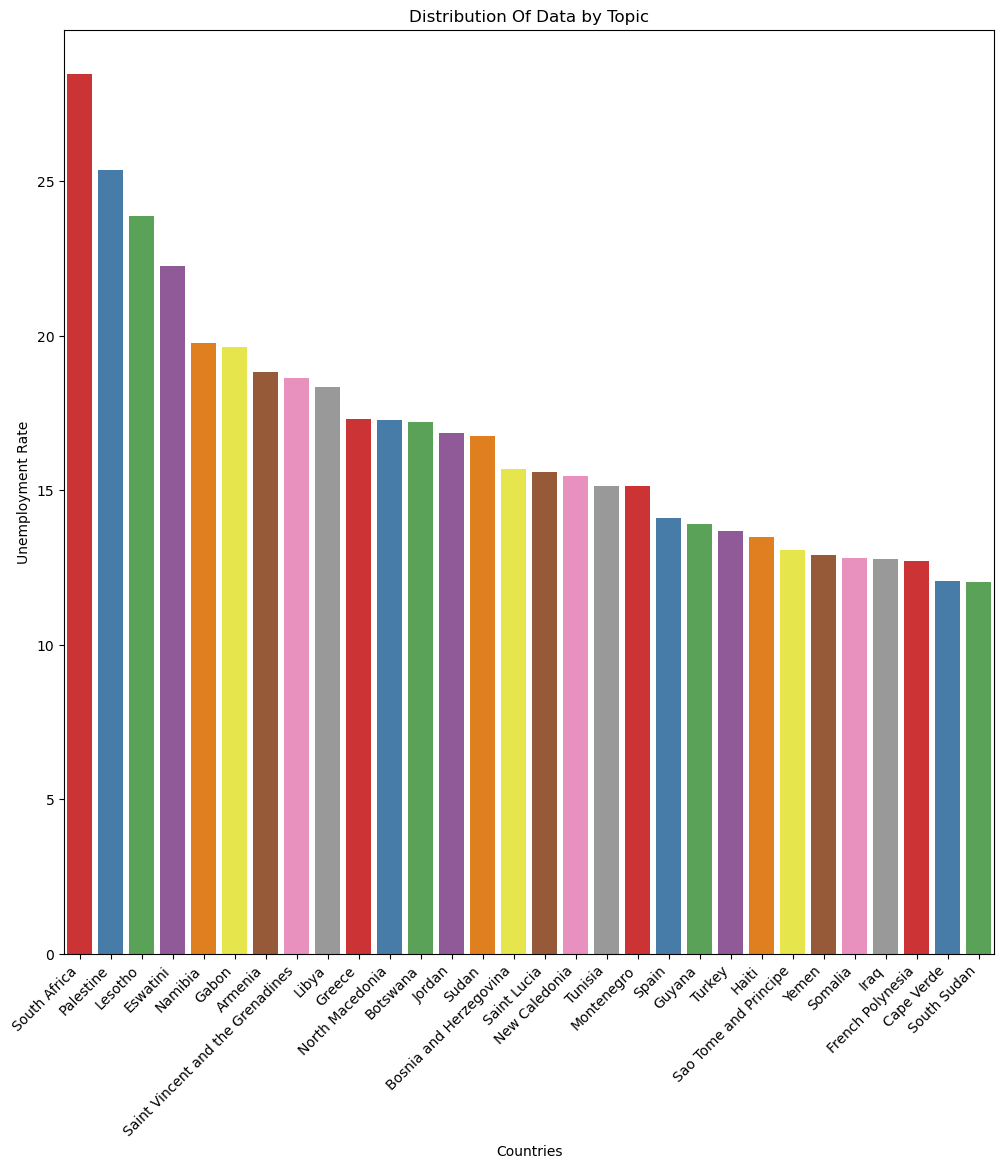

In [40]:
plt.figure(figsize=(12,12))
sns.barplot( data=unemp_bar, x='Countries', y = 'Unemployment Rate', palette='Set1')
plt.ylabel('Unemployment Rate')
plt.xticks(rotation=45, horizontalalignment='right',fontweight='light')
plt.title('Distribution Of Data by Topic')

In [41]:
import requests

In [42]:
URL = 'https://en.wikipedia.org/wiki/Global_Peace_Index'

response = requests.get(URL)

In [43]:
type(response)

requests.models.Response

In [44]:
from bs4 import BeautifulSoup as BS

In [45]:
soup = BS(response.text)

In [46]:
print(soup.prettify())

<!DOCTYPE html>
<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-zebra-design-disabled vector-feature-custom-font-size-clientpref-disabled vector-feature-client-preferences-disabled vector-feature-typography-survey-disabled vector-toc-available" dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <title>
   Global Peace Index - Wikipedia
  </title>
  <script>
   (function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vecto

In [47]:
soup.findAll('table')

[<table class="wikitable">
 <tbody><tr>
 <td>
 </td>
 <td><b>Indicator</b>
 </td>
 <td><b>Source</b>
 </td>
 <td><b>Coding</b>
 </td></tr>
 <tr>
 <td>1
 </td>
 <td>Number and duration of internal conflicts<sup class="reference" id="cite_ref-6"><a href="#cite_note-6">[a]</a></sup>
 </td>
 <td>UCDP, IEP
 </td>
 <td>Total number
 </td></tr>
 <tr>
 <td>2
 </td>
 <td>Number of deaths from external organized conflict
 </td>
 <td>UCDP Armed Conflict Dataset
 </td>
 <td>Total number
 </td></tr>
 <tr>
 <td>3
 </td>
 <td>Number of deaths from internal organized conflict
 </td>
 <td>International Institute for Strategic Studies, Armed Conflict Database
 </td>
 <td>Total number
 </td></tr>
 <tr>
 <td>4
 </td>
 <td>Number, duration, and role in external conflicts
 </td>
 <td>UCDP Battle-related Deaths Dataset, IEP
 </td>
 <td>Total number
 </td></tr>
 <tr>
 <td>5
 </td>
 <td>Intensity of organized internal conflict
 </td>
 <td>EIU
 </td>
 <td>Qualitative scale, ranked 1 to 5
 </td></tr>
 <tr>
 <td>

In [48]:
soup.find('table', attrs={'class' : 'wikitable sortable jquery-tablesorter'})

In [49]:
table_html = str(soup.find('table', attrs={'class' : 'wikitable sortable jquery-tablesorter'}))

from IPython.core.display import HTML

HTML(table_html)

In [50]:
soup.findAll('table')

[<table class="wikitable">
 <tbody><tr>
 <td>
 </td>
 <td><b>Indicator</b>
 </td>
 <td><b>Source</b>
 </td>
 <td><b>Coding</b>
 </td></tr>
 <tr>
 <td>1
 </td>
 <td>Number and duration of internal conflicts<sup class="reference" id="cite_ref-6"><a href="#cite_note-6">[a]</a></sup>
 </td>
 <td>UCDP, IEP
 </td>
 <td>Total number
 </td></tr>
 <tr>
 <td>2
 </td>
 <td>Number of deaths from external organized conflict
 </td>
 <td>UCDP Armed Conflict Dataset
 </td>
 <td>Total number
 </td></tr>
 <tr>
 <td>3
 </td>
 <td>Number of deaths from internal organized conflict
 </td>
 <td>International Institute for Strategic Studies, Armed Conflict Database
 </td>
 <td>Total number
 </td></tr>
 <tr>
 <td>4
 </td>
 <td>Number, duration, and role in external conflicts
 </td>
 <td>UCDP Battle-related Deaths Dataset, IEP
 </td>
 <td>Total number
 </td></tr>
 <tr>
 <td>5
 </td>
 <td>Intensity of organized internal conflict
 </td>
 <td>EIU
 </td>
 <td>Qualitative scale, ranked 1 to 5
 </td></tr>
 <tr>
 <td>

In [51]:
global_peace_indx=pd.read_html(str(soup.findAll('table')))[2]

global_peace_indx.head(2)

Country 2019[10]        2018[11]        2017[12]        2016[13]         \
      Country     Rank  Score     Rank  Score     Rank  Score     Rank  Score   
0  Luxembourg        —      —        —      —        —      —        —      —   
1     Iceland        1  1.072        1  1.096        1  1.111        1  1.192   

  2015[14]  ... 2014[15]        2013[16]        2012[17]        2011[18]  \
      Rank  ...     Rank  Score     Rank  Score     Rank  Score     Rank   
0        —  ...        —      —        —      —        —      —        —   
1        1  ...        1  1.189        1  1.162        1  1.113        1   

         2010[19]         
   Score     Rank  Score  
0      —       7=  1.341  
1  1.148        2  1.212  

[2 rows x 21 columns]

In [52]:
globpeace_2019=global_peace_indx[['Country','2019[10]']]

In [53]:
globpeace_2019

Country 2019[10]       
         Country     Rank  Score
0     Luxembourg        —      —
1        Iceland        1  1.072
2    New Zealand        2  1.221
3       Portugal        3  1.274
4        Austria        4  1.291
..           ...      ...    ...
159         Iraq      159  3.369
160        Yemen      160  3.412
161  South Sudan      161  3.526
162        Syria      162  3.566
163  Afghanistan      163  3.574

[164 rows x 3 columns]

peace=globpeace_2015_2019.groupby(['Country', '2019 rank']).sum().reset_index()
peace=peace.sort_values('2019 rank', ascending = True)
peace=peace.head(10)

In [54]:
migrant_by_origin_and_dest=pd.read_excel("../Data/UN_MigrantStockByOriginAndDestination_2019.xlsx", sheet_name= 'Table 1',
              header=15, skiprows=[*range(16, 1454), *range(1474, 1475), *range(1484, 1485), *range(1490,1491),*range(1508,1510),
                                  *range(1517,1518),*range(1536,1538),*range(1543,1544),*range(1553,1555),*range(1562,1563),
                                   *range(1574,1576),*range(1602,1603),*range(1611,1612),*range(1626,1628),*range(1630,1631),
                                  *range(1636,1637),*range(1644,1645),*range(1654,1657),*range(1667,1668),*range(1681,1682),
                                  *range(1698,1699),*range(1708,1709),*range(1714,1737),*range(1757,1758),*range(1767,1768),
                                  *range(1773,1774),*range(1791,1793),*range(1800,1801),*range(1819,1821),*range(1826,1827),
                                   *range(1836,1838),*range(1845,1846),*range(1857,1859),*range(1885,1886),*range(1894,1895),
                                   *range(1909,1911),*range(1913,1914),*range(1919,1920),*range(1927,1928),*range(1937,1940),
                                   *range(1950,1951),*range(1964,1965),*range(1981,1982),*range(1991,1992)]
)



In [55]:
migrant_by_orig=migrant_by_origin_and_dest.loc[(migrant_by_origin_and_dest['Unnamed: 0']==2019)]

In [56]:
migrant_by_orig=migrant_by_orig.rename(columns = {'Unnamed: 0':'Year','Unnamed: 1' :'Sort order',
                                          'Unnamed: 2' : 'Major country, area of destination','Unnamed: 3' :'Notes',
                                  'Unnamed: 4' : 'Code', 'Unnamed: 5':'Type of data'})

In [57]:
migrant_by_orig= migrant_by_orig.loc[:, ~migrant_by_orig.columns.isin(['Total', 'Notes', 'Code', 'Type of data', 'Other South', 'Other North'])]

In [58]:
migrant_by_orig.rename(columns= {'Major country, area of destination': 'Country of Destination',
                                 'Country of departure':'Country of Departure' })

,Year,Sort order,Country of Destination,Afghanistan,Albania,Algeria,American Samoa,Andorra,Angola,Anguilla,...,Uruguay,Uzbekistan,Vanuatu,Venezuela (Bolivarian Republic of),Viet Nam,Wallis and Futuna Islands,Western Sahara,Yemen,Zambia,Zimbabwe
232,2019,2019024,Burundi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
233,2019,2019025,Comoros,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
234,2019,2019026,Djibouti,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,272.0,NaN,NaN
235,2019,2019027,Eritrea,NaN,NaN,NaN,NaN,NaN,349.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,243.0,327.0
236,2019,2019028,Ethiopia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,156.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
459,2019,2019279,Bermuda,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
460,2019,2019280,Canada,55339.0,16363.0,68822.0,NaN,NaN,3322.0,68.0,...,6959.0,6799.0,NaN,22130.0,180258.0,NaN,NaN,3151.0,3956.0,11176.0
461,2019,2019281,Greenland,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
462,2019,2019282,Saint Pierre and Miquelon,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [59]:
migrant_by_orig.fillna(0)

,Year,Sort order,"Major country, area of destination",Afghanistan,Albania,Algeria,American Samoa,Andorra,Angola,Anguilla,...,Uruguay,Uzbekistan,Vanuatu,Venezuela (Bolivarian Republic of),Viet Nam,Wallis and Futuna Islands,Western Sahara,Yemen,Zambia,Zimbabwe
232,2019,2019024,Burundi,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
233,2019,2019025,Comoros,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
234,2019,2019026,Djibouti,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,272.0,0.0,0.0
235,2019,2019027,Eritrea,0.0,0.0,0.0,0.0,0.0,349.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,243.0,327.0
236,2019,2019028,Ethiopia,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,156.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
459,2019,2019279,Bermuda,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
460,2019,2019280,Canada,55339.0,16363.0,68822.0,0.0,0.0,3322.0,68.0,...,6959.0,6799.0,0.0,22130.0,180258.0,0.0,0.0,3151.0,3956.0,11176.0
461,2019,2019281,Greenland,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
462,2019,2019282,Saint Pierre and Miquelon,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [60]:
country_list=list(set(migrant_by_orig['Major country, area of destination']))

In [61]:
country_list

['Afghanistan',
 'Cook Islands',
 'Romania',
 'Uruguay',
 'Belize',
 'Mali',
 'Northern Mariana Islands',
 'Solomon Islands',
 'Samoa',
 'Tonga',
 'Benin',
 'Algeria',
 'Monaco',
 'Russian Federation',
 'Ghana',
 'Nicaragua',
 'Costa Rica',
 'Kuwait',
 'Sierra Leone',
 'Bulgaria',
 'Cyprus',
 'Hungary',
 'Egypt',
 'Vanuatu',
 'Bahamas',
 'Guadeloupe',
 'South Africa',
 'Montserrat',
 'Gibraltar',
 'Azerbaijan',
 'Angola',
 'Cuba',
 'France',
 'Tajikistan',
 'Tokelau',
 'Mauritania',
 'Panama',
 'Liechtenstein',
 'Saint Pierre and Miquelon',
 'Australia',
 'Saint Helena',
 "Dem. People's Republic of Korea",
 'Viet Nam',
 'Montenegro',
 'Malta',
 'Switzerland',
 'Peru',
 'Barbados',
 'Turkmenistan',
 'Maldives',
 'New Zealand',
 'El Salvador',
 'Anguilla',
 'Nigeria',
 'Mongolia',
 'Liberia',
 'Niger',
 'Denmark',
 'Congo',
 'China, Macao SAR',
 'Bonaire, Sint Eustatius and Saba',
 'China, Hong Kong SAR',
 'Burkina Faso',
 'Aruba',
 'New Caledonia',
 'State of Palestine',
 'Suriname',
 '

In [62]:
country_by_dest=migrant_by_orig.melt(id_vars=['Year', 'Major country, area of destination'], value_vars= country_list)

In [63]:
country_by_dest=country_by_dest.rename(columns = {'variable':'Country of departure','value' : 'Total number of immigrants'})

In [64]:
country_by_dest=country_by_dest[country_by_dest['Total number of immigrants'].notna()]

In [65]:
country_by_dest=country_by_dest.rename(columns= {'Major country, area of destination': 'Country of Destination','Country of departure':'Country of Departure' })

In [66]:
country_by_dest

,Year,Country of Destination,Country of Departure,Total number of immigrants
32,2019,Namibia,Afghanistan,44.0
33,2019,South Africa,Afghanistan,162.0
40,2019,Guinea,Afghanistan,2.0
43,2019,Mali,Afghanistan,534.0
52,2019,Egypt,Afghanistan,208.0
...,...,...,...,...
53813,2019,Germany,Kazakhstan,940296.0
53817,2019,Netherlands,Kazakhstan,382.0
53818,2019,Switzerland,Kazakhstan,3735.0
53820,2019,Canada,Kazakhstan,13259.0


In [67]:
country_of_dest=country_by_dest.loc[country_by_dest['Year'] ==2019]
country_of_dest=country_of_dest.groupby(['Country of Destination', 'Year']).sum().reset_index()
country_of_dest=country_of_dest.sort_values('Total number of immigrants', ascending = False)

In [68]:
country_of_dest

,Country of Destination,Year,Total number of immigrants
220,United States of America,2019,48065741.0
81,Germany,2019,13020724.0
181,Saudi Arabia,2019,12680056.0
170,Russian Federation,2019,11639894.0
217,United Kingdom,2019,9491593.0
...,...,...,...
176,Saint Pierre and Miquelon,2019,969.0
151,Niue,2019,529.0
206,Tokelau,2019,464.0
173,Saint Helena,2019,360.0


In [69]:
country_of_dest_top_10=country_by_dest.loc[country_by_dest['Year'] ==2019]
country_of_dest_top_10=country_of_dest_top_10.groupby(['Country of Destination', 'Year']).sum().reset_index()
country_of_dest_top_10=country_of_dest_top_10.sort_values('Total number of immigrants', ascending = False)
country_of_dest_top_10=country_of_dest_top_10.head(10)

Text(0.5, 1.0, 'Distribution Of Data by Topic')

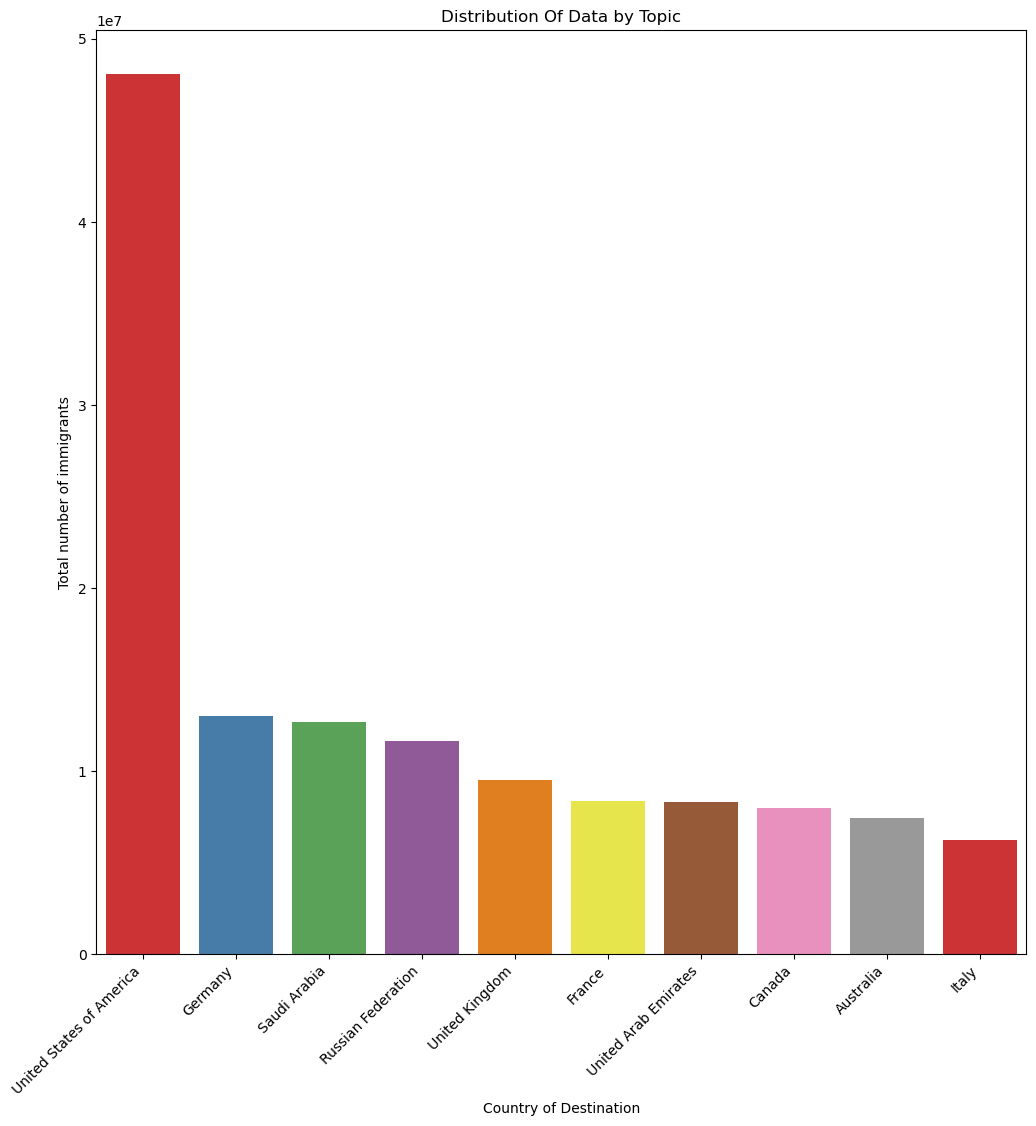

In [70]:
plt.figure(figsize=(12,12))
sns.barplot( data=country_of_dest_top_10, x='Country of Destination', y = 'Total number of immigrants', palette='Set1')
plt.ylabel('Total number of immigrants')
plt.xticks(rotation=45, horizontalalignment='right',fontweight='light')
plt.title('Distribution Of Data by Topic')

In [71]:
country_of_departure=country_by_dest.loc[country_by_dest['Year'] ==2019]
country_of_departure=country_of_departure.groupby(['Country of Departure', 'Year']).sum().reset_index()
country_of_departure=country_of_departure.sort_values('Total number of immigrants', ascending = False)


In [72]:
country_of_departure=country_of_departure.rename(columns={'Country of Departure': 'Countries'})
country_of_departure

,Countries,Year,Total number of immigrants
98,India,2019,17513533.0
134,Mexico,2019,11796491.0
43,China,2019,10734807.0
171,Russian Federation,2019,10575205.0
202,Syrian Arab Republic,2019,8274868.0
...,...,...,...
38,Cayman Islands,2019,1974.0
3,American Samoa,2019,1817.0
71,Falkland Islands (Malvinas),2019,1623.0
177,Saint Pierre and Miquelon,2019,431.0


In [73]:
country_of_departure_10=country_by_dest.loc[country_by_dest['Year'] ==2019]
country_of_departure_10=country_of_departure_10.groupby(['Country of Destination', 'Year']).sum().reset_index()
country_of_departure_10=country_of_departure_10.sort_values('Total number of immigrants', ascending = False)
country_of_departure_10=country_of_departure_10.head(10)

In [74]:
country_of_departure_10

,Country of Destination,Year,Total number of immigrants
220,United States of America,2019,48065741.0
81,Germany,2019,13020724.0
181,Saudi Arabia,2019,12680056.0
170,Russian Federation,2019,11639894.0
217,United Kingdom,2019,9491593.0
75,France,2019,8334875.0
216,United Arab Emirates,2019,8326184.0
37,Canada,2019,7956487.0
11,Australia,2019,7451863.0
104,Italy,2019,6228525.0


Text(0.5, 1.0, 'Distribution Of Data by Topic')

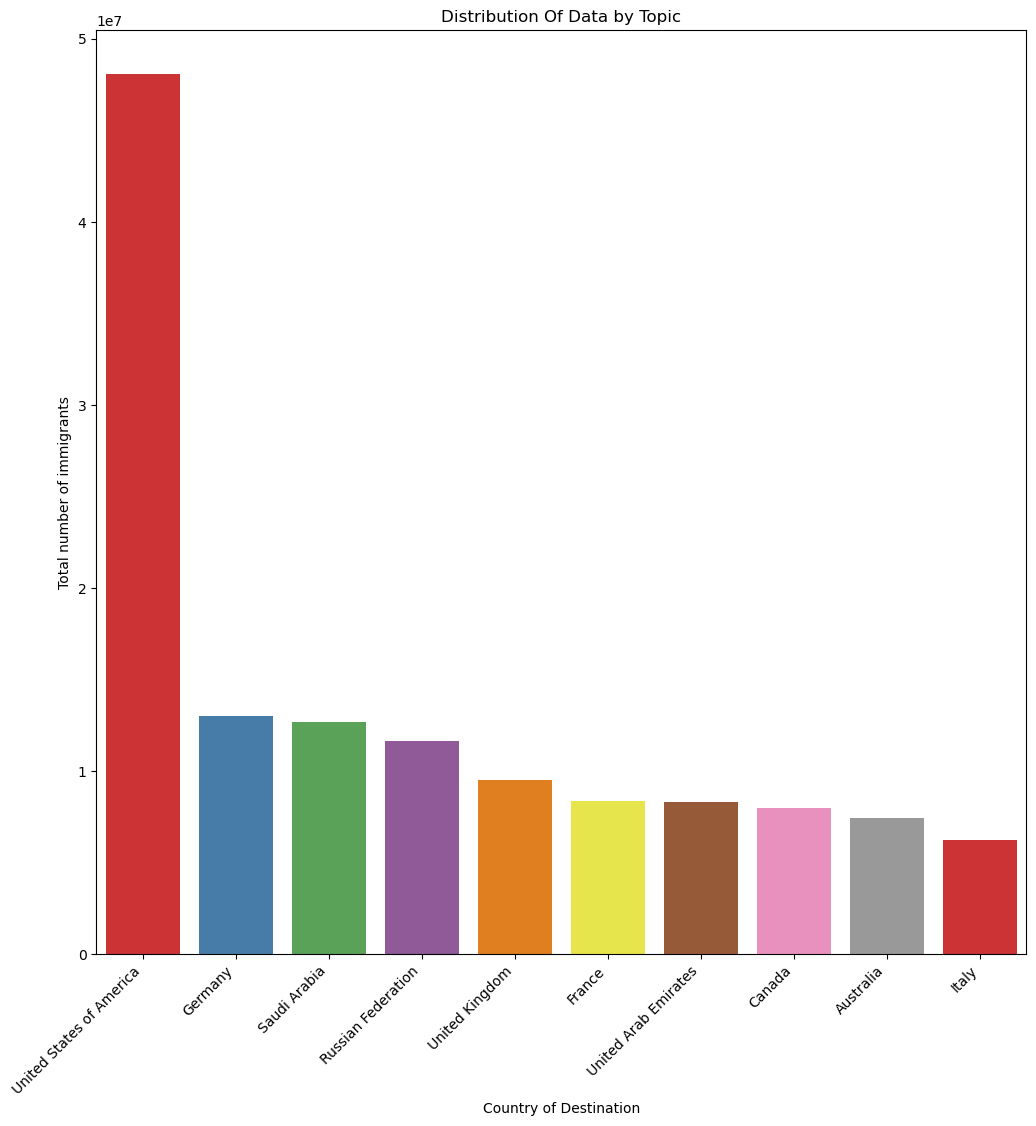

In [75]:
plt.figure(figsize=(12,12))
sns.barplot( data=country_of_departure_10, x='Country of Destination', y = 'Total number of immigrants', palette='Set1')
plt.ylabel('Total number of immigrants')
plt.xticks(rotation=45, horizontalalignment='right',fontweight='light')
plt.title('Distribution Of Data by Topic')


In [76]:
country_pop_merge=pd.merge(country_of_departure, country_pop)
country_pop_merge

,Countries,Year,Total number of immigrants,Sort order,M/F pop 2019
0,India,2019,17513533.0,117,1.366418e+09
1,Mexico,2019,11796491.0,178,1.275755e+08
2,China,2019,10734807.0,125,1.457558e+09
3,Russian Federation,2019,10575205.0,234,1.458723e+08
4,Syrian Arab Republic,2019,8274868.0,102,1.707014e+07
...,...,...,...,...,...
227,Cayman Islands,2019,1974.0,153,6.494800e+04
228,American Samoa,2019,1817.0,215,5.531200e+04
229,Falkland Islands (Malvinas),2019,1623.0,188,3.377000e+03
230,Saint Pierre and Miquelon,2019,431.0,282,5.822000e+03


In [77]:
#merged_pop_dest=pd.merge(country_of_dest,country_pop, how='left', left_on=['Country of destination'], right_on=['Country'])

In [78]:
country_pop

,Sort order,Countries,M/F pop 2019
0,24,Burundi,11530580.0
1,25,Comoros,850886.0
2,26,Djibouti,973560.0
3,27,Eritrea,3497117.0
4,28,Ethiopia,112078730.0
...,...,...,...
255,279,Bermuda,62506.0
256,280,Canada,37411047.0
257,281,Greenland,56672.0
258,282,Saint Pierre and Miquelon,5822.0


In [79]:
country_by_dest.head()

,Year,Country of Destination,Country of Departure,Total number of immigrants
32,2019,Namibia,Afghanistan,44.0
33,2019,South Africa,Afghanistan,162.0
40,2019,Guinea,Afghanistan,2.0
43,2019,Mali,Afghanistan,534.0
52,2019,Egypt,Afghanistan,208.0


In [80]:
#merg_pop_dest=pd.merge(country_by_dest, country_pop, how='left', left_on=['Country of Destination'], right_on=['Countries'])
#merg_pop_dest.head()

In [81]:
#merg_pop_dest.sort_values(['Countries'])

In [82]:
#merg_pop_dest.columns

NameError: name 'merg_pop_dest' is not defined

In [83]:
# country_by_dest df shows each country multiple times and I want to see the number of Emigrants per country
merg_pop_dest=country_by_dest.groupby(['Country of Departure']).sum(['Total number of immigrants']).reset_index()
merg_pop_dest.head()

,Country of Departure,Year,Total number of immigrants
0,Afghanistan,137292,5120959.0
1,Albania,109026,1207092.0
2,Algeria,149406,1945035.0
3,American Samoa,16152,1817.0
4,Andorra,50475,9114.0


In [85]:
country_pop.head()

,Sort order,Countries,M/F pop 2019
0,24,Burundi,11530580.0
1,25,Comoros,850886.0
2,26,Djibouti,973560.0
3,27,Eritrea,3497117.0
4,28,Ethiopia,112078730.0


In [87]:
merg_pop_dest=pd.merge(merg_pop_dest, country_pop, how='left', left_on=['Country of Departure'], right_on=['Countries'])
merg_pop_dest.head()

,Country of Departure,Year,Total number of immigrants,Sort order,Countries,M/F pop 2019
0,Afghanistan,137292,5120959.0,114,Afghanistan,38041754.0
1,Albania,109026,1207092.0,252,Albania,2880917.0
2,Algeria,149406,1945035.0,80,Algeria,43053054.0
3,American Samoa,16152,1817.0,215,American Samoa,55312.0
4,Andorra,50475,9114.0,253,Andorra,77142.0


In [88]:
merg_pop_dest['2019_immigrants_per_100k']=(merg_pop_dest['Total number of immigrants']/merg_pop_dest['M/F pop 2019'])*100000

In [89]:
merg_pop_dest.head()

,Country of Departure,Year,Total number of immigrants,Sort order,Countries,M/F pop 2019,2019_immigrants_per_100k
0,Afghanistan,137292,5120959.0,114,Afghanistan,38041754.0,13461.416632
1,Albania,109026,1207092.0,252,Albania,2880917.0,41899.575725
2,Algeria,149406,1945035.0,80,Algeria,43053054.0,4517.763130
3,American Samoa,16152,1817.0,215,American Samoa,55312.0,3285.001446
4,Andorra,50475,9114.0,253,Andorra,77142.0,11814.575718


In [ ]:
merg_pop_dest=merg_pop_dest.drop(columns=['Sort order'])

In [ ]:
merg_pop_dest.head()

In [ ]:
country_pop.to_csv('../Data/country_pop2.csv')
mass_killing_sra.to_csv('../Data/mass_killing_sra2.csv')
unemp_bar.to_csv('../Data/unemp_bar2.csv')
globpeace_2019.to_csv('../Data/globalpeace_20192.csv')
country_of_dest.to_csv('../Data/country_of_dest2.csv')
country_of_departure.to_csv('../Data/country_of_departure2.csv')
country_pop_merge.to_csv('../Data/country_pop_merge2.csv')

In [ ]:
migrant_by_origin_and_dest=pd.read_excel("../Data/UN_MigrantStockByOriginAndDestination_2019.xlsx", sheet_name= 'Table 1',
              header=15, skiprows=[*range(16, 1454), *range(1474, 1475), *range(1484, 1485), *range(1490,1491),*range(1508,1510),
                                  *range(1517,1518),*range(1536,1538),*range(1543,1544),*range(1553,1555),*range(1562,1563),
                                   *range(1574,1576),*range(1602,1603),*range(1611,1612),*range(1626,1628),*range(1630,1631),
                                  *range(1636,1637),*range(1644,1645),*range(1654,1657),*range(1667,1668),*range(1681,1682),
                                  *range(1698,1699),*range(1708,1709),*range(1714,1737),*range(1757,1758),*range(1767,1768),
                                  *range(1773,1774),*range(1791,1793),*range(1800,1801),*range(1819,1821),*range(1826,1827),
                                   *range(1836,1838),*range(1845,1846),*range(1857,1859),*range(1885,1886),*range(1894,1895),
                                   *range(1909,1911),*range(1913,1914),*range(1919,1920),*range(1927,1928),*range(1937,1940),
                                   *range(1950,1951),*range(1964,1965),*range(1981,1982),*range(1991,1992)]
)

In [ ]:
migrant_by_orig=migrant_by_origin_and_dest.loc[(migrant_by_origin_and_dest['Unnamed: 0']==2019)]

In [ ]:
migrant_by_orig=migrant_by_orig.rename(columns = {'Unnamed: 0':'Year','Unnamed: 1' :'Sort order',
                                          'Unnamed: 2' : 'Major country, area of destination','Unnamed: 3' :'Notes',
                                  'Unnamed: 4' : 'Code', 'Unnamed: 5':'Type of data'})

In [ ]:
migrant_by_orig= migrant_by_orig.loc[:, ~migrant_by_orig.columns.isin(['Total', 'Notes', 'Code', 'Type of data', 'Other South', 'Other North'])]

In [ ]:
migrant_by_orig

In [ ]:
migrant_by_orig.fillna(0)

In [ ]:
country_list=list(set(migrant_by_orig['Major country, area of destination']))

In [ ]:
country_of_origin=migrant_by_orig.melt(id_vars=['Year', 'Major country, area of destination'], value_vars= country_list)

In [ ]:
country_of_origin

In [ ]:
country_of_origin=country_of_origin.rename(columns = {'variable':'Country of departure','value' : 'Total number of immigrants'})

In [ ]:
country_of_origin=country_of_origin[country_of_origin['Total number of immigrants'].notna()]

In [ ]:
country_of_origin

In [ ]:
country_by_dest

In [ ]:
country_pop